<h1> MALARIA DATA ANALYSIS </h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'/Users/briangor/Downloads/Malaria-studies.csv')
df

,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT01976325,Evaluating the Ottawa Malaria Decision Aid,https://clinicaltrials.gov/study/NCT01976325,OMDA,UNKNOWN,BRIEF SUMMARY\n\nCanadians often visit areas w...,NO,Malaria,OTHER: Ottawa Malaria Decision Aid,"Travellers' Knowledge Score, The traveller's k...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,2010462-01H,2014-01,2015-11,2015-11,2013-11-05,NaN,2015-04-16,National Capital Region Occupational Health Cl...,NaN
1,NCT00914225,Effect of Bednets and a Water Purification Dev...,https://clinicaltrials.gov/study/NCT00914225,ITN,COMPLETED,In many areas of the world most severely affec...,NO,HIV Infections|Human Immunodeficiency Virus|Ma...,OTHER: Bednets and Water Purification,To determine the effect of LLIN and a simple m...,...,Observational Model: |Time Perspective: p,35464-B|SSC#1554,2009-09,2011-12,2011-12,2009-06-04,NaN,2015-05-29,"Kisii Provincial Hospital, Kisii, Kenya|Kisumu...",NaN
2,NCT05605925,Ivermectin-artemisinin Combination Therapy for...,https://clinicaltrials.gov/study/NCT05605925,IVIME,RECRUITING,Malaria remains a leading cause of morbidity a...,NO,Malaria,DRUG: Artemether/lumefantrine|DRUG: Ivermectin,"Malaria transmission rates in a household, Mal...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,MAKSHSREC-2021-237,2022-08-04,2022-12-31,2022-12-31,2022-11-04,NaN,2022-11-04,"ST. Paul's Health Center, Kasese, Uganda",NaN
3,NCT01464125,Fosmidomycin and Azithromycin for Acute Uncomp...,https://clinicaltrials.gov/study/NCT01464125,JP011,UNKNOWN,The aim of this study is to evaluate the role ...,NO,Malaria,DRUG: Fosmidomycin|DRUG: Azithromycin,"day 28 cure rate of >95%, Efficacy of fosmidom...",...,Allocation: NON_RANDOMIZED|Intervention Model:...,JP011,2008-11,2009-10,2011-12,2011-11-03,NaN,2011-11-03,"Mahidol University, Bangkok, 10400, Thailand",NaN
4,NCT02557425,Prophylaxis Against Malaria to Enhance Child D...,https://clinicaltrials.gov/study/NCT02557425,PROTECT,COMPLETED,"Each year, \~85.3 million pregnant women are a...",NO,Neurobehavioral Manifestations,OTHER: No intervention in PROTECT,"Z-scores for Overall cognitive ability, 12 mon...",...,Observational Model: |Time Perspective: p,1506994146,2015-10,2021-08-05,2021-08-05,2015-09-23,NaN,2021-08-25,"Tororo District Hospital, Tororo, Uganda",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,NCT02700269,Vanderbilt-Zambia Innovations in Global Health...,https://clinicaltrials.gov/study/NCT02700269,VZNIGHT,COMPLETED,Investigators will evaluate approaches using m...,NO,Malaria Diagnosis,OTHER: mBEADS,Enhancement of malaria RDT to detect low level...,...,Observational Model: |Time Perspective: p,MRT15003.2|5D43TW009348,2016-04,2019-02,2019-02,2016-03-07,NaN,2020-02-19,"Macha Research Trust, Choma, Zambia",NaN
1326,NCT01575613,Reducing the Burden of Malaria by Targeting Ho...,https://clinicaltrials.gov/study/NCT01575613,REDHOT,COMPLETED,"In this study, the investigators propose to de...",NO,Malaria,DRUG: Artemether-lumefantrine combination|BIOL...,Parasite prevalence in the evaluation zone sur...,...,Allocation: RANDOMIZED|Intervention Model: PAR...,REDHOT_OPP1024438,2012-04,2012-11,2012-11,2012-04-11,NaN,2012-11-27,"Rachuonyo District, Kenya",NaN
1327,NCT03963869,Effectiveness of Malaria Camps as Part of the ...,https://clinicaltrials.gov/study/NCT03963869,CSCMi20,COMPLETED,The Odisha State Malaria Control Program (Indi...,NO,Malaria,OTHER: Malaria Camps,"Parasite presence, The standard molecular meth...",...,Allocation: NON_RANDOMIZED|Intervention Model:...,19-00122,2019-08-03,2020-11-30,2021-03-31,2019-05-28,NaN,2022-01-11,"Community Welfare Society Hospital, Rourkela, ...",Informed Consent Form
1328,NCT004603

In [3]:
df.shape #representing the number of rows and columns

(1330, 30)

In [4]:
df.columns

Index(['NCT Number', 'Study Title', 'Study URL', 'Acronym', 'Study Status',
       'Brief Summary', 'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures',
       'Other Outcome Measures', 'Sponsor', 'Collaborators', 'Sex', 'Age',
       'Phases', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date',
       'First Posted', 'Results First Posted', 'Last Update Posted',
       'Locations', 'Study Documents'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NCT Number                  1330 non-null   object 
 1   Study Title                 1330 non-null   object 
 2   Study URL                   1330 non-null   object 
 3   Acronym                     445 non-null    object 
 4   Study Status                1330 non-null   object 
 5   Brief Summary               1330 non-null   object 
 6   Study Results               1330 non-null   object 
 7   Conditions                  1330 non-null   object 
 8   Interventions               1204 non-null   object 
 9   Primary Outcome Measures    1271 non-null   object 
 10  Secondary Outcome Measures  1095 non-null   object 
 11  Other Outcome Measures      135 non-null    object 
 12  Sponsor                     1330 non-null   object 
 13  Collaborators               909 n

<h2> Temporal Trends in the Study of Malaria </h2>

1982.0     1
1993.0     1
1995.0     1
1997.0     1
1998.0     3
1999.0     2
2000.0     6
2001.0     7
2002.0    23
2003.0    34
2004.0    38
2005.0    57
2006.0    66
2007.0    65
2008.0    49
2009.0    58
2010.0    82
2011.0    61
2012.0    61
2013.0    67
2014.0    73
2015.0    73
2016.0    86
2017.0    43
2018.0    61
2019.0    55
2020.0    54
2021.0    73
2022.0    62
2023.0    54
2024.0     2
Name: Start Date, dtype: int64


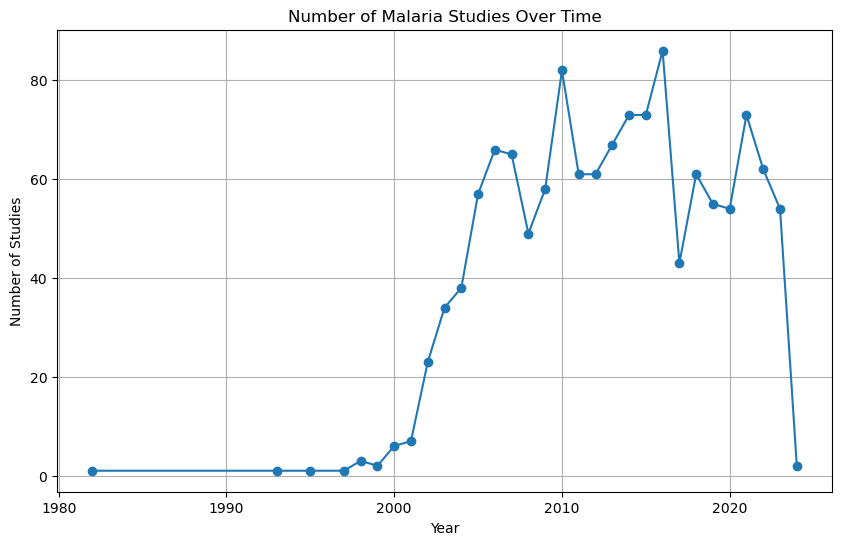

In [6]:
# Convert 'Start Date' to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])

# Extract year from 'Start Date' and count studies per year
studies_per_year = df['Start Date'].dt.year.value_counts().sort_index()
print(studies_per_year)

# Plot the number of studies over time

plt.figure(figsize=(10, 6))
plt.plot(studies_per_year.index, studies_per_year.values, marker='o', linestyle='-')
plt.title('Number of Malaria Studies Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Studies')
plt.grid(True)
plt.show()

The number of malaria studies gradually increased, with variations, until reaching **the highest point in 2016 when 86 studies were conducted**.

After 2016, there was a decline in the number of studies conducted, with some fluctuations.
In recent years, there has been a **consistent number of studies, ranging from 54 to 73, from 2020 to 2023.**

### Interpretation:
The data shows the trend of malaria studies conducted over the years. It indicates fluctuations in the number of studies, with peaks and declines. Notably, there was a significant increase in the number of studies from the early 2000s to 2016, possibly reflecting heightened efforts to combat malaria. The subsequent decline and stabilization in the number of studies may suggest a steady commitment to malaria research and control.

Keep in mind that the exact reasons for these trends would require further investigation and domain-specific knowledge. These trends could be influenced by factors such as changes in funding, disease prevalence, medical advancements, and global health priorities.

<h2> Distribution of Malaria Studies Phases </h2>

PHASE1           229
PHASE4           200
PHASE3           168
PHASE2           137
PHASE1|PHASE2     73
PHASE2|PHASE3     37
EARLY_PHASE1       9
Name: Phases, dtype: int64


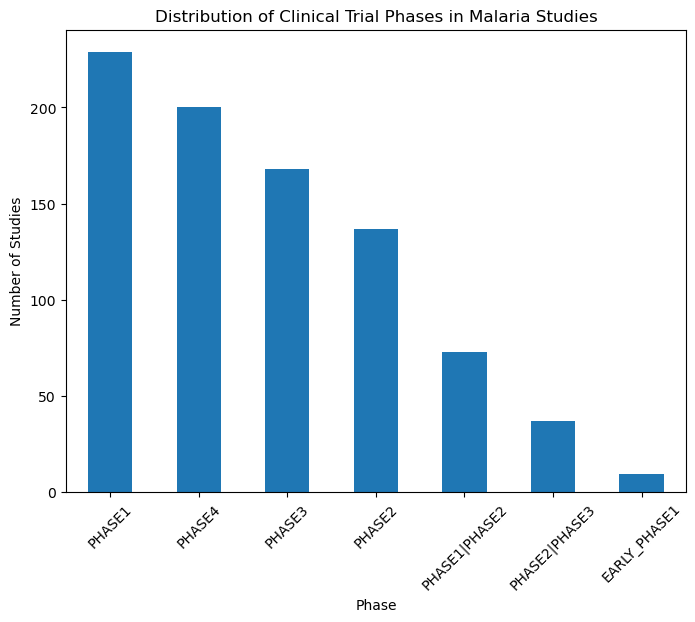

In [31]:
# Count the number of studies in each phase
phase_distribution = df['Phases'].value_counts()
print(phase_distribution)

# Plot a bar chart for phase distribution
plt.figure(figsize=(8, 6))
phase_distribution.plot(kind='bar')
plt.title('Distribution of Clinical Trial Phases in Malaria Studies')
plt.xlabel('Phase')
plt.ylabel('Number of Studies')
plt.xticks(rotation=45)
plt.show()

PHASE1: There are **229 malaria studies in phase 1**. This suggests that a significant number of studies are in the early stages of development, where safety and dosage are primarily assessed.

PHASE4: There are **200 malaria studies in phase 4**. Phase 4 studies typically focus on post-marketing surveillance to monitor the long-term safety and efficacy of treatments.

PHASE3: There are **168 malaria studies in phase 3**. Phase 3 studies are critical for determining the effectiveness and safety of potential treatments, often involving large patient populations.

PHASE2: There are **137 malaria studies in phase 2**. Phase 2 studies aim to further evaluate safety and effectiveness and typically involve more participants than phase 1 trials.

PHASE1|PHASE2: There are **73 malaria studies that appear to be a combination of both phase 1 and phase 2**. This could indicate studies that assess both safety and preliminary efficacy.

PHASE2|PHASE3: There are **37 malaria studies that seem to be a combination of phase 2 and phase 3**. These studies may involve a transition from evaluating safety to assessing efficacy on a larger scale.

EARLY_PHASE1: There are **9 malaria studies in the early phase 1**. These studies are likely in the very early stages of development, focusing on safety and dosing.

### Interpretation:
The data reflects the distribution of malaria studies across different phases of clinical trials. It suggests that a diverse range of trials is being conducted, including early-phase safety assessments, larger-scale efficacy studies, and post-marketing surveillance. The presence of studies in various phases demonstrates a comprehensive approach to malaria research, with a focus on both safety and effectiveness at different stages of development. The specific goals and objectives of these studies may vary based on their respective phases.

<h2> Top 10 Malaria Conditions </h2>

Malaria                          807
Malaria,Falciparum                73
Plasmodium Falciparum Malaria     72
Malaria, Falciparum               64
Malaria, Vivax                    41
Anemia                            31
Malaria in Pregnancy              30
Plasmodium Falciparum             29
Vivax Malaria                     29
Falciparum Malaria                28
Name: Conditions, dtype: int64


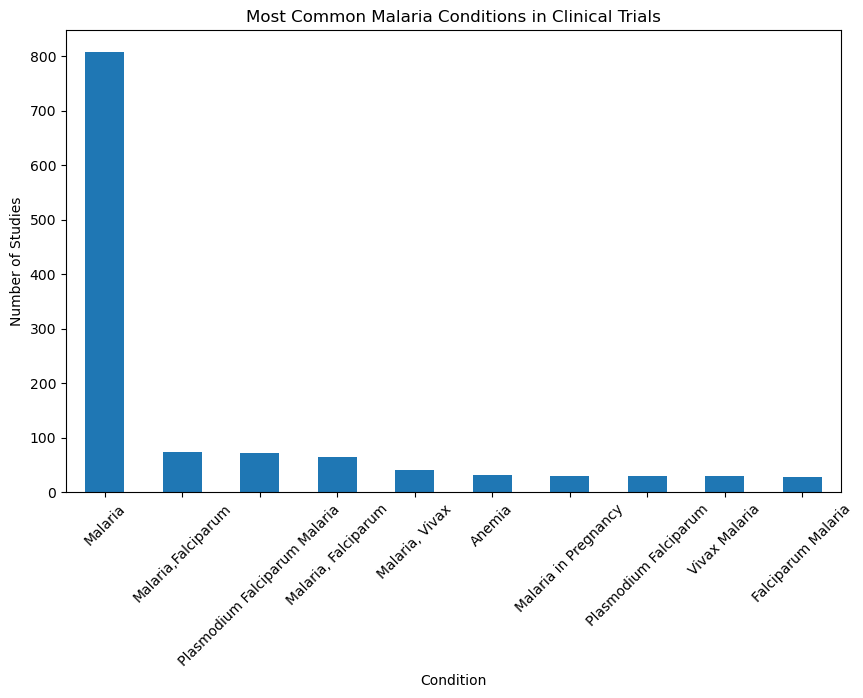

In [9]:
# Count the occurrences of each Malaria condition
common_conditions = df['Conditions'].str.split('|').explode().str.strip().value_counts().head(10)
print(common_conditions)

# Plot a bar chart for common Malaria conditions
plt.figure(figsize=(10, 6))
common_conditions.plot(kind='bar')
plt.title('Most Common Malaria Conditions in Clinical Trials')
plt.xlabel('Condition')
plt.ylabel('Number of Studies')
plt.xticks(rotation=45)
plt.show()

The top conditions associated with malaria studies reflect the diversity of research within the field. The **primary focus is on malaria itself**, with a **particular emphasis on the Falciparum strain**. Understanding different strains, complications like anemia, and malaria during pregnancy are also priorities. This diversity indicates a comprehensive approach to tackling the complex challenges of malaria, which varies by region and parasite type.

<h2> Study Types And Designs </h2>

INTERVENTIONAL    1113
OBSERVATIONAL      217
Name: Study Type, dtype: int64


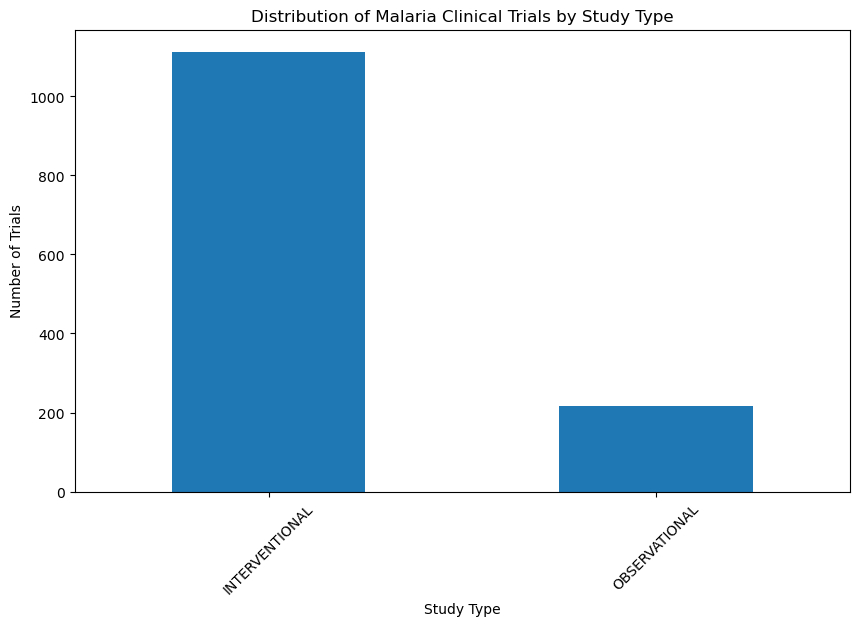

In [11]:
# Count the number of trials by study type
study_type_counts = df['Study Type'].value_counts()
print(study_type_counts)

# Plot a bar chart for study type distribution
plt.figure(figsize=(10, 6))
study_type_counts.plot(kind='bar')
plt.title('Distribution of Malaria Clinical Trials by Study Type')
plt.xlabel('Study Type')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)
plt.show()

**INTERVENTIONAL (1113 studies)**: The majority of studies in the dataset fall under the "INTERVENTIONAL" category. Interventional studies typically involve experiments or clinical trials where researchers actively intervene to assess the impact of a treatment, drug, or other interventions on participants. In the context of malaria research, this could include testing new drugs, vaccines, or treatment strategies.

**OBSERVATIONAL (217 studies)**: The "OBSERVATIONAL" category represents a smaller but still significant portion of the studies. Observational studies involve the collection and analysis of data without any direct intervention. Researchers observe and analyze participants' health and behaviors, often to better understand the natural course of a disease, risk factors, or outcomes. In the context of malaria, this might involve epidemiological studies, cohort studies, or surveys to understand patterns of infection and disease progression.

### Interpretation:
The dataset contains a **significant number of interventional studies**, indicating a focus on testing and evaluating treatments or interventions for malaria. These studies are likely aimed at developing new therapies or improving existing ones. The presence of observational studies suggests a complementary approach to gather valuable data on the natural history and epidemiology of malaria, which can inform the design of interventions and public health strategies. Both types of studies play crucial roles in advancing our understanding of malaria and improving its management.

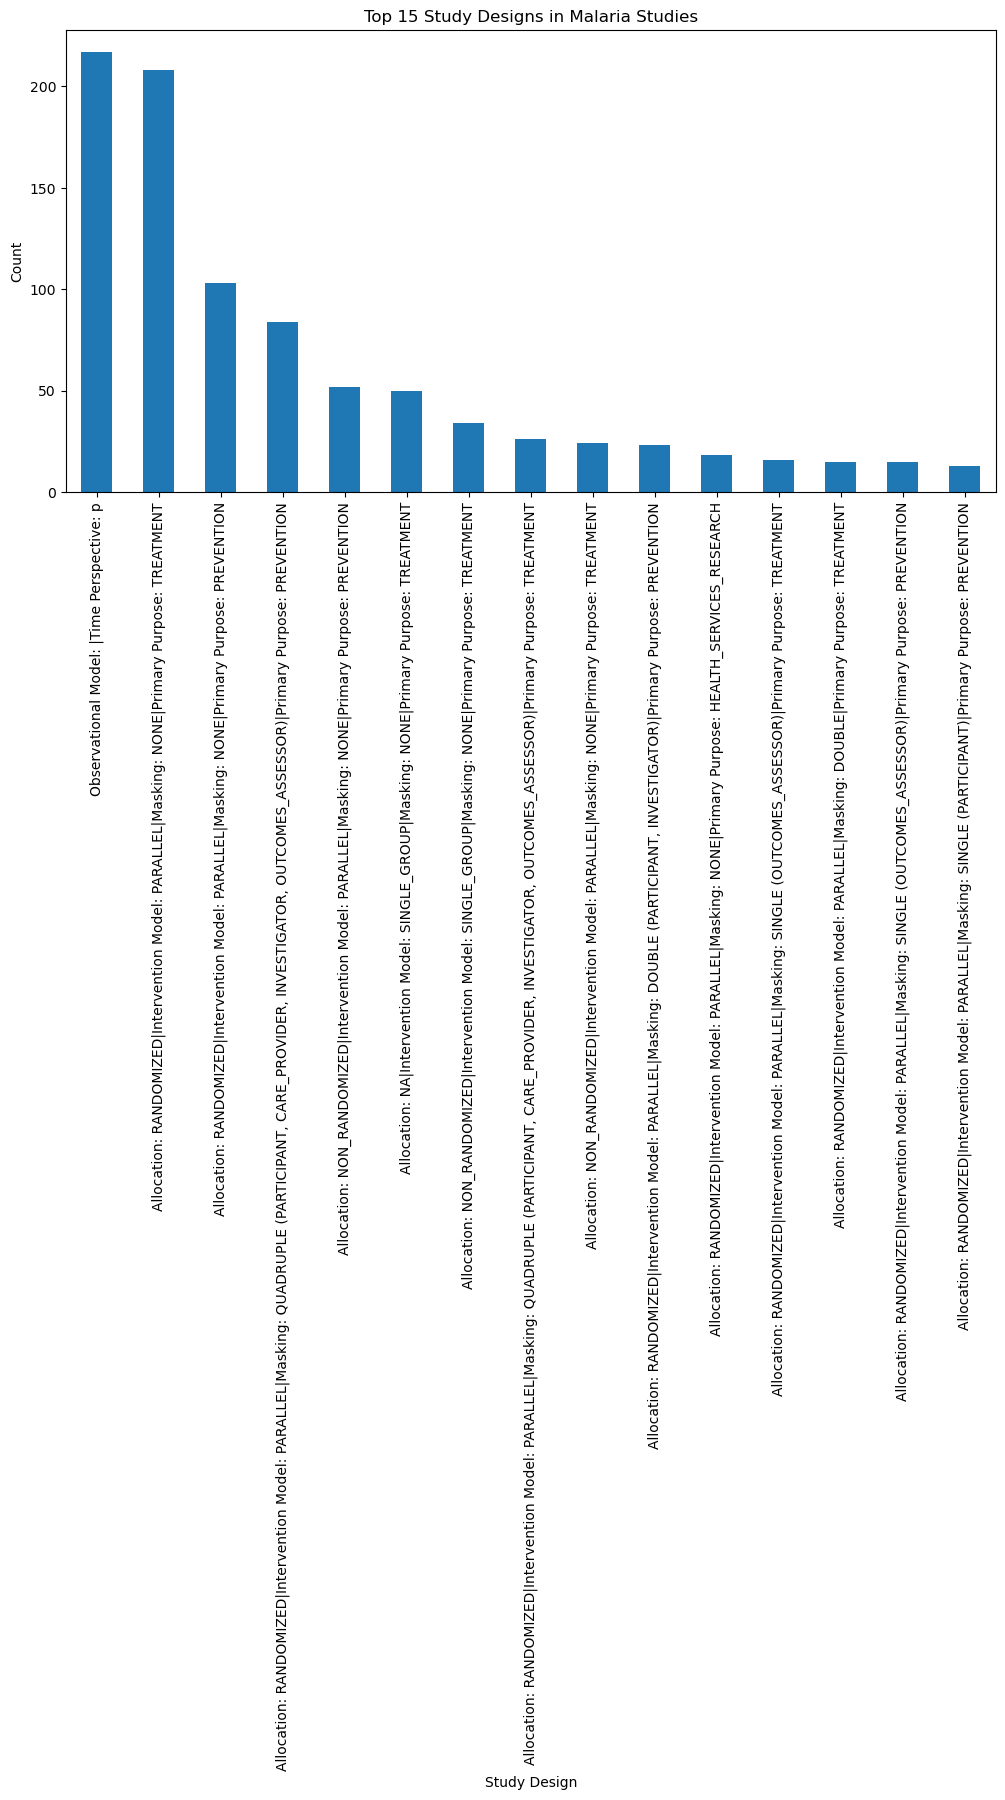

In [12]:
# Study Design Analysis
study_design_counts = df['Study Design'].value_counts()

plt.figure(figsize=(12, 6))
study_design_counts[:15].plot(kind='bar')
plt.title('Top 15 Study Designs in Malaria Studies')
plt.xlabel('Study Design')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<h2> Distribution of Funding Types </h2>

OTHER        874
INDUSTRY     178
NIH          120
FED           83
OTHER_GOV     62
NETWORK       12
UNKNOWN        1
Name: Funder Type, dtype: int64


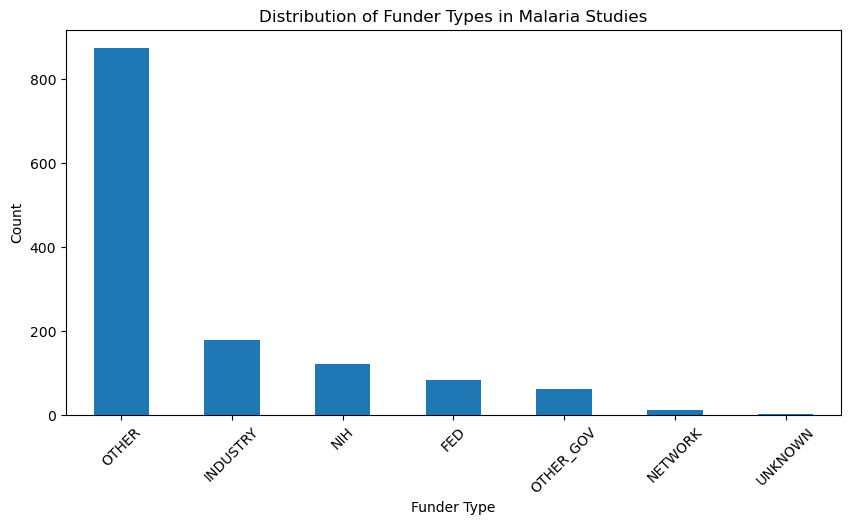

In [32]:
# Analyze the distribution of funder types
funder_type_counts = df['Funder Type'].value_counts()
print(funder_type_counts)

plt.figure(figsize=(10, 5))
funder_type_counts.plot(kind='bar')
plt.title('Distribution of Funder Types in Malaria Studies')
plt.xlabel('Funder Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**OTHER (874 studies)**: The majority of malaria studies in the dataset are funded by sources categorized as "OTHER." This category likely includes a wide range of funding entities, such as **private foundations, non-profit organizations, and potentially other government agencies** not explicitly listed in the specific categories.

**INDUSTRY (178 studies)**: A significant number of studies are funded by the industry, which may include **pharmaceutical companies, biotech firms, or other private sector entities**. Industry funding often supports clinical trials and the development of new treatments.

**NIH (120 studies)**: The **National Institutes of Health (NIH) is a prominent source** of funding for malaria research. It is a U.S. government agency dedicated to supporting and conducting biomedical and health-related research.

**FED (83 studies)**: "FED" likely represents studies funded by various federal agencies. This could include agencies within the **U.S. federal government or potentially other countries' government agencies**.

**OTHER_GOV (62 studies)**: "OTHER_GOV" signifies studies funded by government agencies other than the NIH or those categorized as "FED." These could be **international or regional government entities**.

**NETWORK (12 studies)**: The "NETWORK" category may include studies that are part of larger research networks or consortiums with their own funding sources.

**UNKNOWN (1 study)**: There is one study with an unknown or unspecified funding source.

### Interpretation:
The dataset reflects a diverse range of funding sources for malaria studies, with the **majority falling into the "OTHER" category**. This diversity suggests a collaborative and multifaceted approach to funding malaria research, involving both government agencies and private sector organizations. It's important to note that funding sources can influence the scope, objectives, and focus of studies, and understanding these sources can provide insights into the landscape of malaria research funding.

<h2> Distribution of Age Groups </h2>

CHILD, ADULT, OLDER_ADULT    395
CHILD                        375
ADULT                        358
ADULT, OLDER_ADULT           109
CHILD, ADULT                  93
Name: Age, dtype: int64


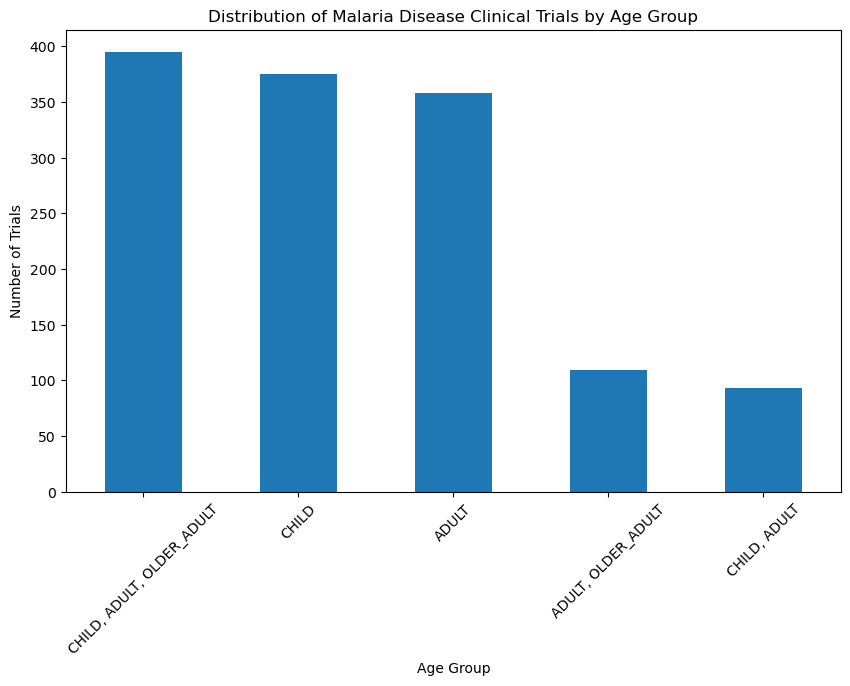

In [14]:
# Count the number of trials by age group
age_group_counts = df['Age'].value_counts()
print(age_group_counts)

# Plot a bar chart for age group distribution
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar')
plt.title('Distribution of Malaria Disease Clinical Trials by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)
plt.show()

**CHILD, ADULT, OLDER_ADULT (395 participants)**: This category indicates studies that involve participants from all three age groups—children, adults, and older adults. These studies likely aim to assess the impact of malaria and its treatments across different age categories.

**CHILD (375 participants)**: These studies specifically focus on children as participants. Malaria can affect children differently than adults or older adults, so research targeting this age group is essential.

**ADULT (358 participants)**: Studies in this category primarily involve adult participants. Adult populations are often the focus of clinical trials and research.

**ADULT, OLDER_ADULT (109 participants)**: These studies include both adults and older adults. They may aim to examine the differences or similarities in malaria outcomes between these two age groups.

**CHILD, ADULT (93 participants)**: This category comprises studies involving both children and adults but not older adults. It may focus on a broader age range, excluding the elderly.

### Interpretation:
The dataset reflects a diverse range of age group participation in malaria studies, indicating a comprehensive approach to understanding malaria's impact on different age categories. This inclusivity in research design is crucial for developing effective prevention and treatment strategies that cater to the specific needs of each age group, as malaria can affect individuals differently based on their age.

<h2> Collaborators Analysis </h2>

In [15]:
# Collaborators Analysis of the top 10
# Count the number of studies involving each collaborator
collaborators=df['Collaborators'].str.split('|').explode().str.strip().value_counts().head(10)
print(collaborators)

World Health Organization                                        43
London School of Hygiene and Tropical Medicine                   43
Kenya Medical Research Institute                                 41
Centers for Disease Control and Prevention                       38
Medicines for Malaria Venture                                    35
National Institute of Allergy and Infectious Diseases (NIAID)    35
Walter Reed Army Institute of Research (WRAIR)                   32
United States Agency for International Development (USAID)       28
The PATH Malaria Vaccine Initiative (MVI)                        25
Bill and Melinda Gates Foundation                                24
Name: Collaborators, dtype: int64


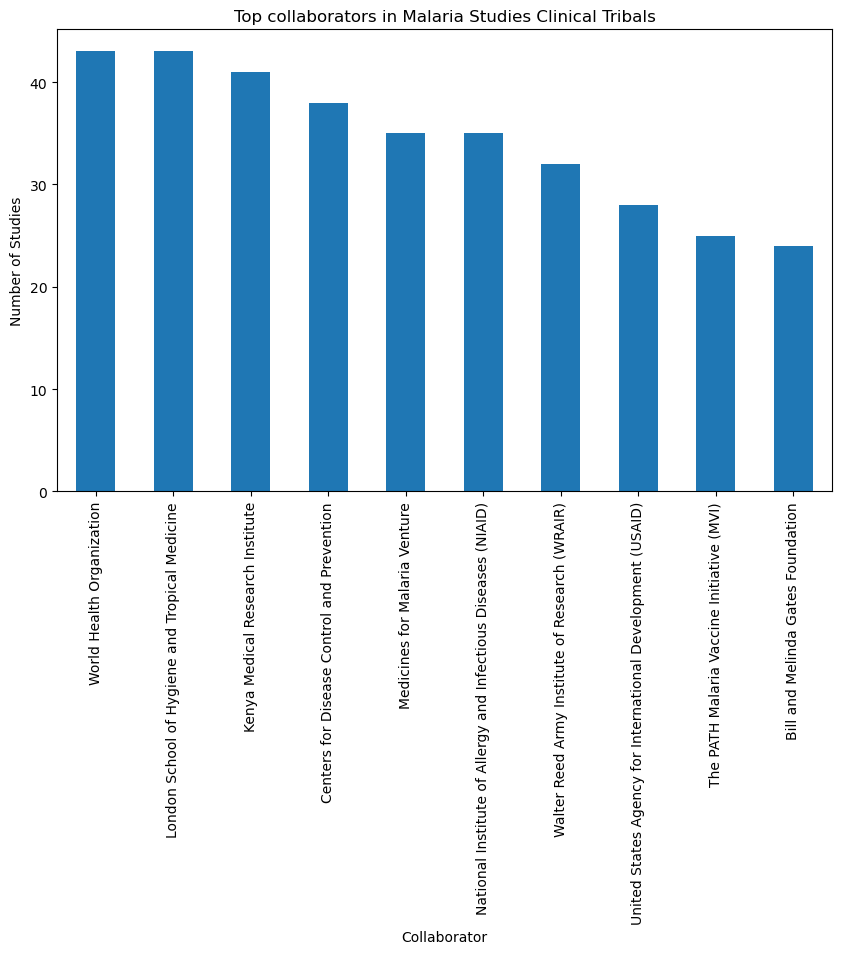

In [16]:
# Plot a bar chart for top collaborators
plt.figure(figsize=(10,6))
collaborators.plot(kind='bar')
plt.title('Top collaborators in Malaria Studies Clinical Tribals')
plt.xlabel('Collaborator')
plt.ylabel('Number of Studies')
plt.show()

**World Health Organization (WHO)**: WHO is a **prominent international organization involved in global health efforts**. Its sponsorship of malaria studies indicates a commitment to understanding and combating malaria's impact worldwide.

**London School of Hygiene and Tropical Medicine**: This renowned institution is dedicated to research and education in the fields of hygiene, epidemiology, and tropical medicine. Its involvement suggests a focus on malaria research, particularly in tropical regions.

**Kenya Medical Research Institute**: A key research institution in Kenya, its sponsorship emphasizes the significance of studying malaria in regions with a high malaria burden, like Kenya.

**Centers for Disease Control and Prevention (CDC)**: CDC is a U.S. government agency focused on public health. Its involvement indicates a commitment to global efforts to control and prevent malaria.

**Medicines for Malaria Venture**: This organization is dedicated to developing and facilitating the delivery of new antimalarial drugs. Its sponsorship highlights the importance of drug research in malaria control.

**National Institute of Allergy and Infectious Diseases (NIAID)**: NIAID is part of the U.S. National Institutes of Health (NIH) and plays a crucial role in funding and conducting research on infectious diseases, including malaria.

**Walter Reed Army Institute of Research (WRAIR)**: This U.S. military research institute is actively engaged in various health-related research efforts, including malaria studies.

**United States Agency for International Development (USAID)**: USAID's involvement signifies the U.S. government's commitment to supporting global health initiatives, including malaria research and control.

**The PATH Malaria Vaccine Initiative (MVI)**: PATH MVI is dedicated to accelerating the development of malaria vaccines, indicating a focus on vaccine-related research.

**Bill and Melinda Gates Foundation**: The Gates Foundation has been a major player in global health, including efforts to combat malaria. Its sponsorship underlines the importance of philanthropic organizations in malaria research and intervention.

### Interpretation:
The presence of a diverse group of sponsors, including international organizations, research institutions, and philanthropic foundations, demonstrates the collaborative and multi-sectoral approach to malaria research. These organizations play pivotal roles in funding, conducting, and supporting studies aimed at better understanding, preventing, and treating malaria, which remains a global health priority.

<h2> Intervention Types </h2>

In [17]:
# Count the occurrence of each intervention type
intervention_types=df['Interventions'].str.split('|').explode().str.strip().value_counts().head(10)
print(intervention_types)

DRUG: Primaquine                             53
DRUG: Chloroquine                            47
DRUG: Placebo                                44
DRUG: Artesunate                             34
DRUG: Artemether-lumefantrine                33
BIOLOGICAL: PfSPZ Vaccine                    22
DRUG: Dihydroartemisinin-piperaquine         21
OTHER: Placebo                               19
DRUG: Artemether-lumefantrine combination    17
OTHER: Normal Saline                         15
Name: Interventions, dtype: int64


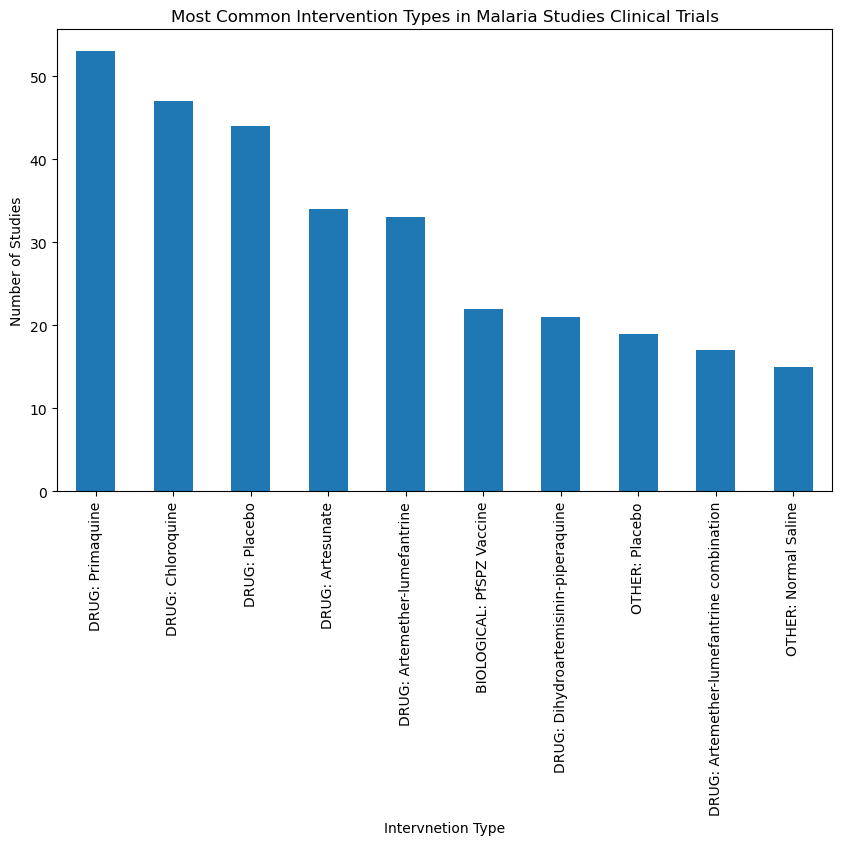

In [33]:
# Plot a bar chart for intervention types
plt.figure(figsize=(10,6))
intervention_types.plot(kind='bar')
plt.title('Most Common Intervention Types in Malaria Studies Clinical Trials')
plt.xlabel('Intervnetion Type')
plt.ylabel('Number of Studies')
plt.show()

**DRUG: Primaquine (53 occurrences)**: Primaquine is an antimalarial drug used for the treatment of Plasmodium vivax malaria and prevention of relapses. Its frequent appearance indicates its significance in malaria studies.

**DRUG: Chloroquine (47 occurrences)**: Chloroquine was historically used as an antimalarial drug, and its continued presence suggests its relevance in research, despite reduced effectiveness due to drug resistance.

**DRUG: Placebo (44 occurrences)**: Placebo is often used in clinical trials as a control group to compare the effects of other interventions. Its inclusion demonstrates the importance of rigorous testing in malaria research.

**DRUG: Artesunate (34 occurrences)**: Artesunate is an artemisinin-based antimalarial drug known for its efficacy in treating severe malaria. Its use is pivotal in studies aiming to improve malaria treatment.

**DRUG: Artemether-lumefantrine (33 occurrences)**: This combination drug is a first-line treatment for uncomplicated malaria. Its presence underscores its role in malaria research and treatment.

**BIOLOGICAL: PfSPZ Vaccine (22 occurrences)**: PfSPZ vaccine represents a type of malaria vaccine. Its inclusion points to the exploration of novel approaches, including vaccines, in malaria prevention.

**DRUG: Dihydroartemisinin-piperaquine (21 occurrences)**: This is another artemisinin-based combination therapy used in malaria treatment. Its frequent appearance suggests its evaluation and efficacy in malaria control.

**OTHER: Placebo (19 occurrences)**: Similar to "DRUG: Placebo," this category includes placebo interventions used as control groups in studies. It reflects the importance of placebo-controlled trials in malaria research.

**DRUG: Artemether-lumefantrine combination (17 occurrences)**: This combination drug is a crucial component of malaria treatment, especially in regions where malaria is prevalent.

**OTHER: Normal Saline (15 occurrences)**: Normal saline may be used as a control or placebo intervention in some studies. Its presence emphasizes the importance of control groups in research.

### Interpretation:
The variety of intervention types in malaria studies reflects the diverse approaches taken to understand, treat, and prevent malaria. These interventions include antimalarial drugs, vaccines, placebos, and other treatments, showcasing the ongoing efforts to combat malaria using different strategies and interventions.

<h2> Sponsorship Analysis </h2>

In [21]:
# Count the number of studies sponsored by each entity type
sponsorship_distribution=df['Sponsor'].value_counts().head(10)
print(sponsorship_distribution)

University of Oxford                                             127
National Institute of Allergy and Infectious Diseases (NIAID)    116
London School of Hygiene and Tropical Medicine                   113
Medicines for Malaria Venture                                     57
GlaxoSmithKline                                                   45
U.S. Army Medical Research and Development Command                38
Centers for Disease Control and Prevention                        37
University of California, San Francisco                           33
Radboud University Medical Center                                 26
Menzies School of Health Research                                 24
Name: Sponsor, dtype: int64


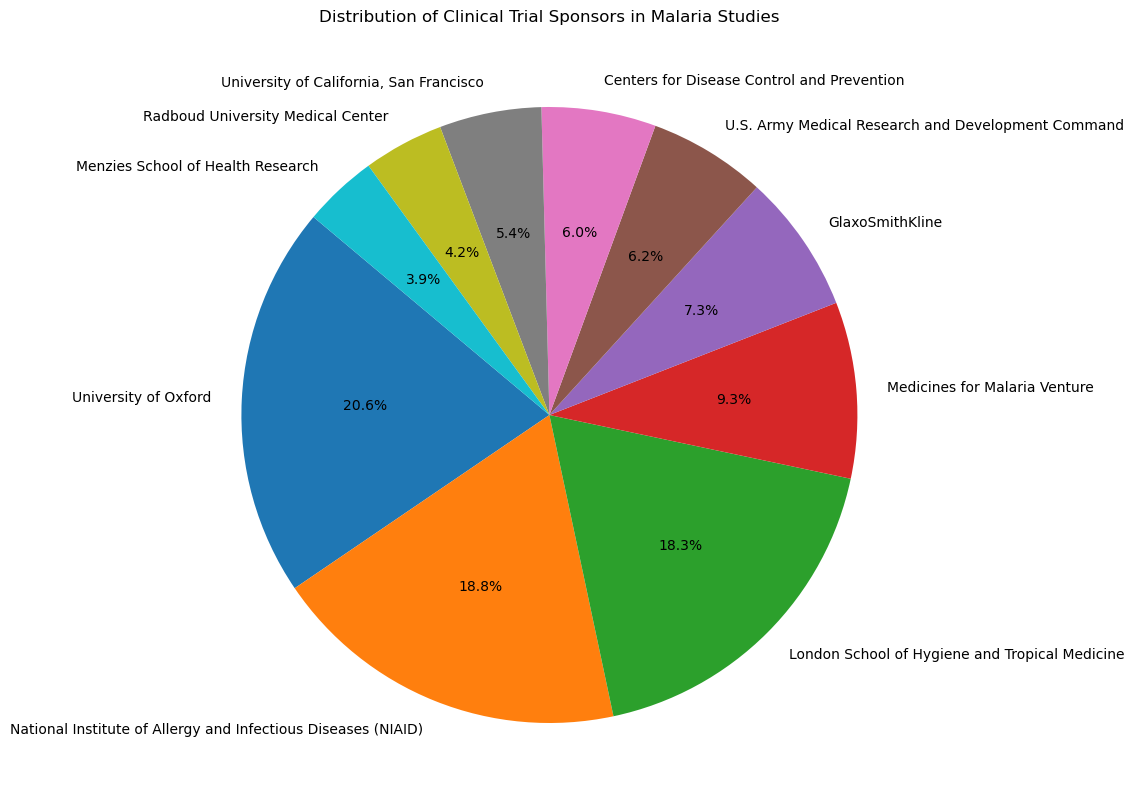

In [22]:
# Plotting a pie chart for sponshorship distribution
plt.figure(figsize=(15,10))
plt.pie(sponsorship_distribution, labels=sponsorship_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Clinical Trial Sponsors in Malaria Studies')
plt.show()

**University of Oxford (127 occurrences)**: The University of Oxford is a prestigious academic institution known for its contributions to various fields, including medical research. Its significant involvement as a sponsor in malaria studies indicates its dedication to advancing knowledge and interventions in the field.

**National Institute of Allergy and Infectious Diseases (NIAID) (116 occurrences)**: NIAID is a part of the U.S. National Institutes of Health (NIH) and plays a critical role in funding and conducting research on infectious diseases, including malaria. Its involvement emphasizes the U.S. government's commitment to global health efforts.

**London School of Hygiene and Tropical Medicine (113 occurrences)**: This renowned institution focuses on research and education in the fields of hygiene, epidemiology, and tropical medicine. Its active sponsorship highlights its dedication to malaria research, particularly in tropical regions.

**Medicines for Malaria Venture (57 occurrences)**: Medicines for Malaria Venture is an organization dedicated to developing and facilitating the delivery of new antimalarial drugs. Its sponsorship underscores the importance of drug research in malaria control.

**GlaxoSmithKline (45 occurrences)**: GlaxoSmithKline is a global pharmaceutical company. Its sponsorship signifies its involvement in research and development of drugs and interventions related to malaria.

**U.S. Army Medical Research and Development Command (38 occurrences)**: This command is involved in various health-related research efforts, including malaria studies. Its sponsorship is aligned with the military's commitment to global health initiatives.

**Centers for Disease Control and Prevention (CDC) (37 occurrences)**: CDC is a U.S. government agency focused on public health. Its involvement underscores the U.S. government's commitment to supporting global health initiatives, including malaria research and control.

**University of California, San Francisco (33 occurrences)**: The University of California, San Francisco, is actively engaged in medical research, including malaria studies. Its sponsorship indicates a commitment to advancing knowledge in the field.

**Radboud University Medical Center (26 occurrences)**: This Dutch medical center is involved in various health-related research, including malaria studies. Its sponsorship highlights international collaboration in malaria research.

**Menzies School of Health Research (24 occurrences)**: The Menzies School of Health Research is an Australian institution dedicated to health research. Its sponsorship reflects its commitment to malaria research, particularly in the context of Australian and regional health.

### Interpretation:
The presence of these diverse sponsors, including academic institutions, governmental agencies, pharmaceutical companies, and research organizations, illustrates the collaborative and multi-sectoral approach to malaria research. These organizations play crucial roles in funding, conducting, and supporting studies aimed at better understanding, preventing, and treating malaria, which remains a global health priority.

<h2> Gender Distribution </h2>

ALL       1172
FEMALE     118
MALE        40
Name: Sex, dtype: int64


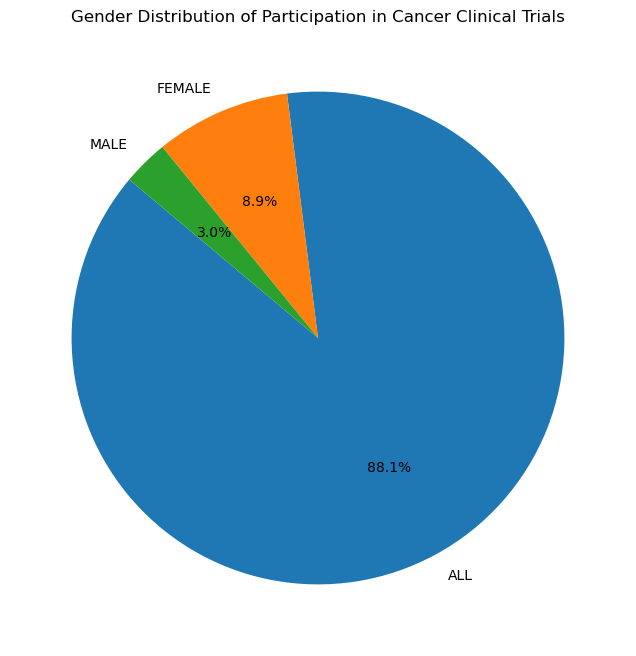

In [27]:
# Count the number of studiies with male and female participants
gender_distribution=df['Sex'].value_counts()
print(gender_distribution)

# Plot a pie chart for gender distribution
plt.figure(figsize=(8,8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Participation in Cancer Clinical Trials')
plt.show()

**ALL (1172 occurrences)**: This category likely represents studies or trials that involve *participants of all genders*, including both males and females.

**FEMALE (118 occurrences)**: This category indicates studies that specifically focus on or include only female participants. These studies might be investigating gender-specific aspects of malaria or related health conditions that predominantly affect females.

**MALE (40 occurrences)**: This category represents studies that specifically focus on or include only male participants. These studies might be examining gender-specific aspects of malaria or related health conditions that predominantly affect males.

### Interpretation:
The distribution of studies across these gender categories suggests a diverse range of research efforts related to malaria. Some studies encompass participants of all genders, while others concentrate on understanding gender-specific aspects of the disease, which is crucial for tailoring healthcare interventions and strategies to different population groups. This diversity in research approaches contributes to a comprehensive understanding of malaria and its impact on different populations.

<h2> Outcome Measures </h2>

In [28]:
# Count the occurrences of primary and secondary outcome measures
pry_outcomes=df['Primary Outcome Measures'].str.split('|').explode().str.strip().value_counts().head(10)
sec_outcomes=df['Secondary Outcome Measures'].str.split('|').explode().str.strip().value_counts().head(10)

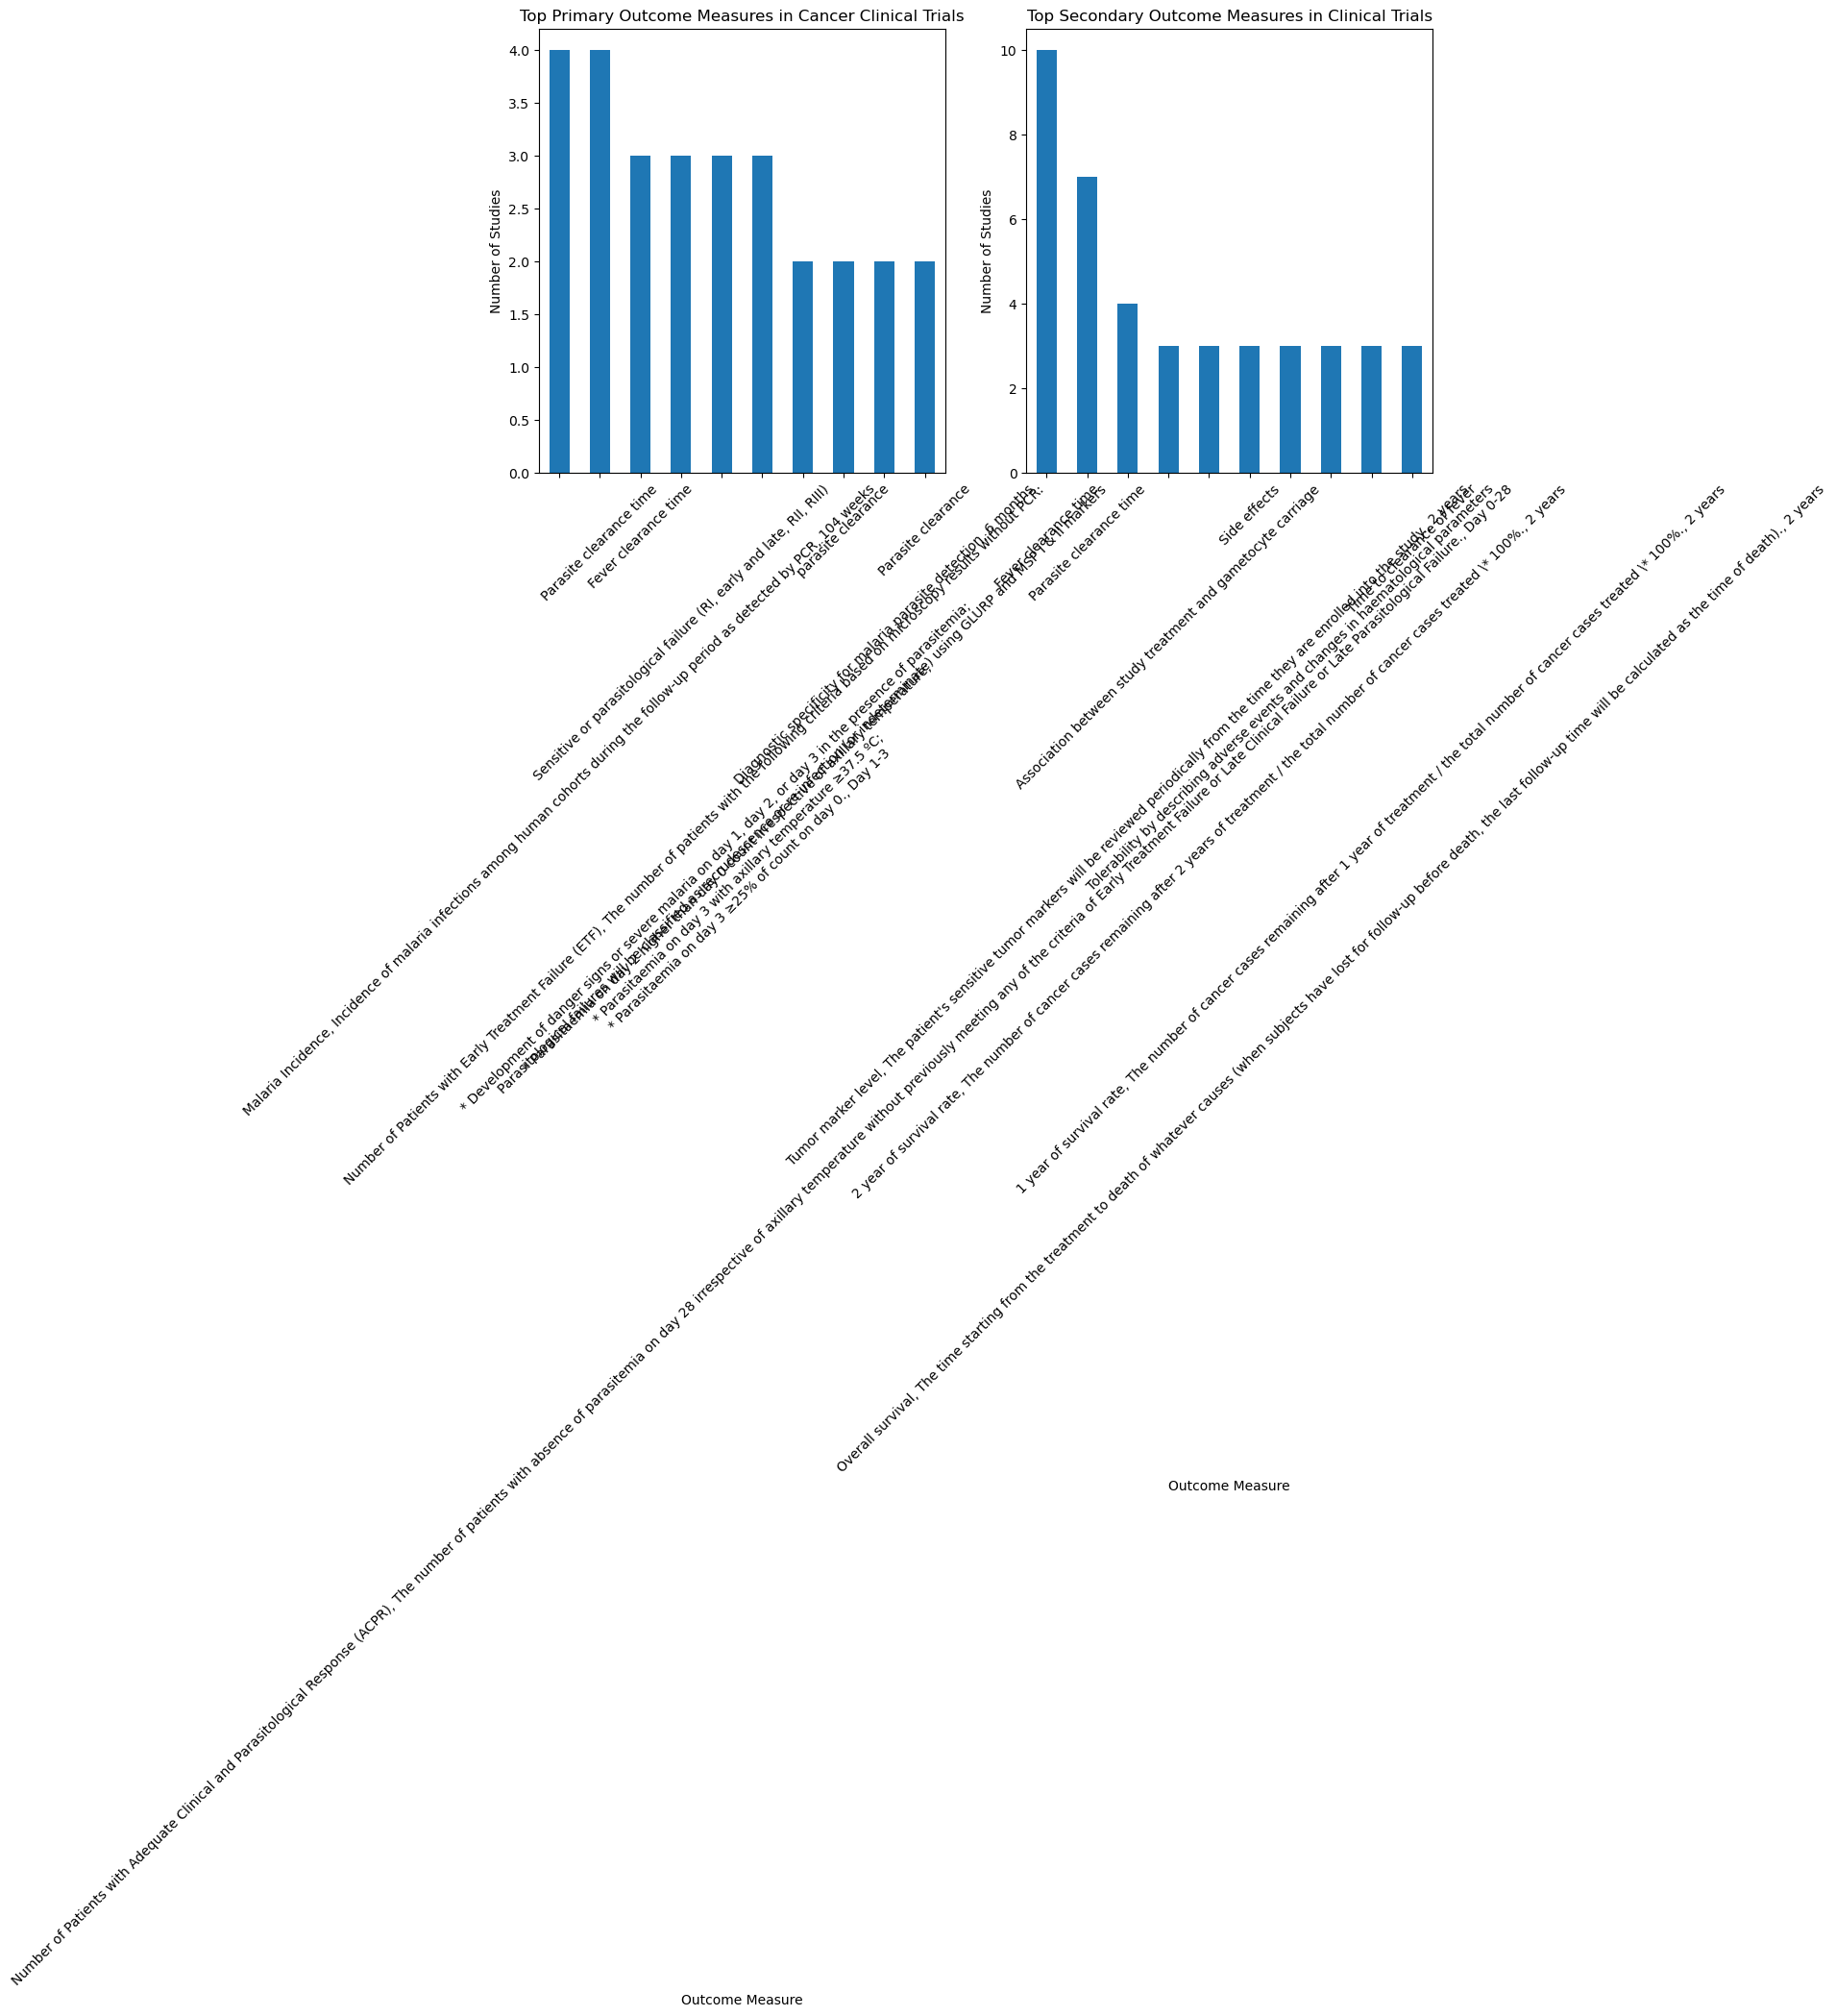

In [29]:
# Plot a bar chart for top outcome measures
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
pry_outcomes.plot(kind='bar')
plt.title('Top Primary Outcome Measures in Cancer Clinical Trials')
plt.xlabel('Outcome Measure')
plt.ylabel('Number of Studies')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sec_outcomes.plot(kind='bar')
plt.title('Top Secondary Outcome Measures in Clinical Trials')
plt.xlabel('Outcome Measure')
plt.ylabel('Number of Studies')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<h2> Clinical Trial Locations </h2>

In [30]:
# Count the number of studies in each location
location_distribution=df['Locations'].str.split('|').explode().str.strip().value_counts().head(10)
print(location_distribution)

Malaria Research and Training Center, Bamako, Mali                                                              14
National Institutes of Health Clinical Center, 9000 Rockville Pike, Bethesda, Maryland, 20892, United States    11
CCVTM, University of Oxford, Churchill Hospital, Oxford, OX3 7LE, United Kingdom                                 9
GSK Investigational Site, Kintampo, Ghana                                                                        9
National Institutes of Health Clinical Center, Bethesda, Maryland, 20892, United States                          8
Shoklo Malaria Research Unit, Mae Sot, Tak, 63110, Thailand                                                      8
GSK Investigational Site, Kumasi, Ghana                                                                          8
Malaria Research and Training Centre, Bamako, Mali                                                               8
Walter Reed Army Institute of Research, Silver Spring, Maryland, 20910, United S

1. **Malaria Research and Training Center, Bamako, Mali (14 occurrences)**: This research center in Bamako, Mali, is actively involved in conducting multiple malaria studies. Mali, located in West Africa, is a region where malaria is prevalent, making it a critical location for malaria research.

2. **National Institutes of Health Clinical Center, 9000 Rockville Pike, Bethesda, Maryland, 20892, United States (11 occurrences)**: The National Institutes of Health (NIH) Clinical Center, situated in Bethesda, Maryland, USA, is a renowned medical research facility actively involved in malaria studies. The U.S. is a significant contributor to global malaria research.

3. **CCVTM, University of Oxford, Churchill Hospital, Oxford, OX3 7LE, United Kingdom (9 occurrences)**: The University of Oxford's Churchill Hospital in the United Kingdom is a prominent location for malaria research. Oxford is known for its contributions to medical research, including malaria studies.

4. **GSK Investigational Site, Kintampo, Ghana (9 occurrences)**: This site in Kintampo, Ghana, is affiliated with GlaxoSmithKline (GSK) and is actively involved in malaria research. Ghana is a malaria-endemic country, and research here is crucial for understanding the disease.

5. **National Institutes of Health Clinical Center, Bethesda, Maryland, 20892, United States (8 occurrences)**: This location, another part of the NIH Clinical Center, contributes to malaria research in the USA, emphasizing the country's commitment to global health efforts.

6. **Shoklo Malaria Research Unit, Mae Sot, Tak, 63110, Thailand (8 occurrences)**: This research unit in Mae Sot, Tak, Thailand, is dedicated to malaria research in a region where malaria is endemic. It plays a vital role in understanding and addressing the disease in Southeast Asia.

7. **GSK Investigational Site, Kumasi, Ghana (8 occurrences)**: Similar to the Kintampo site, this location in Kumasi, Ghana, is affiliated with GSK and is actively engaged in malaria research.

8. **Malaria Research and Training Centre, Bamako, Mali (8 occurrences)**: This is another research center in Bamako, Mali, focusing on malaria studies. Multiple research centers in Mali are contributing to a better understanding of malaria in the region.

9. **Walter Reed Army Institute of Research, Silver Spring, Maryland, 20910, United States (8 occurrences)**: The Walter Reed Army Institute of Research in the USA is involved in various health-related research, including malaria studies. Its location indicates the military's commitment to global health initiatives.

### Interpretation:
These locations highlight the global scope of malaria research, with active research centers and institutions in various countries, both in malaria-endemic regions and developed countries. Research conducted in these locations is essential for advancing our knowledge of malaria, developing interventions, and improving health outcomes for affected populations.